In [2]:
import mglearn1

In [3]:
from IPython.display import display,Math,Latex,HTML

In [4]:
import matplotlib.pyplot as plt

In [5]:
import numpy as np

In [6]:
from sklearn.datasets import make_blobs

In [7]:
%matplotlib inline

In [8]:
X,y=make_blobs(n_samples=100,n_features=2,centers=3,center_box=(-10.0,10.0),random_state=42)

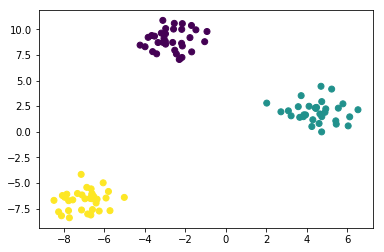

In [9]:
plt.scatter(X[:,0],X[:,1],c=y)

## We generate data points with three (3) classes and train model using Linear SVC

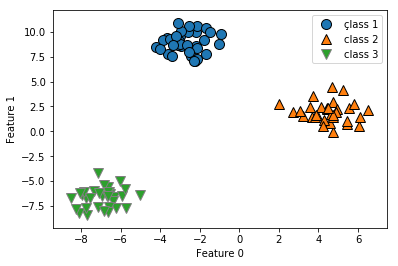

In [10]:
mglearn1.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.legend(["çlass 1","class 2","class 3"],loc='best')

In [11]:
from sklearn.svm import LinearSVC

In [12]:
linear_svm=LinearSVC().fit(X,y)

In [13]:
print("Coefficient shape : {}".format(linear_svm.coef_.shape))
print("Ïntercept shape   : {}".format(linear_svm.intercept_.shape))

Coefficient shape : (3, 2)
Ïntercept shape   : (3,)


In [14]:
linear_svm.coef_[0],linear_svm.intercept_[0]

(array([-0.17492531,  0.23140195]), -1.077458102996772)

## Visualization

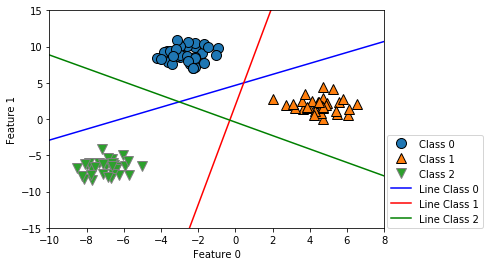

In [15]:
mglearn1.discrete_scatter(X[:,0],X[:,1],y)
xx=np.linspace(-15,15)
for coef, interc, color in zip(linear_svm.coef_,linear_svm.intercept_,['b','r','g']):
    yy=-(xx*coef[0] + interc)/coef[1]
    plt.plot(xx,yy,c=color)

plt.ylim(-15,15)
plt.xlim(-10,8)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.legend((['Class 0','Class 1','Class 2','Line Class 0','Line Class 1','Line Class 2']),loc=(1.01,0.0))



## How each coordinate is going to respond to this trained model
Any point has two features of coordinate , then how to decide what class is going to be tagged
Confidence interval is calculated in the overlapped region and maximum probability value will classify with that class 


In [16]:
linear_svm.predict(np.array([-6,-10]).reshape(-1,2))

array([2])

In [17]:
# 1. Make a grid where we want to paint the region with classifiers
# 2. Run the decision value for each points
# 3. Fill as per the decision values
def plot_2d_classification_nir(classifier,X,eps=0.5,ax=None,alpha=1):
    x_min,x_max=X[:,0].min()-eps , X[:,0].max()+eps
    y_min,y_max=X[:,1].min()-eps , X[:,1].max()+eps
    xx=np.linspace(x_min,x_max,1000)
    yy=np.linspace(y_min,y_max,1000)
    X1,X2=np.meshgrid(xx,yy)
    X_grid=np.c_[X1.ravel(),X2.ravel()]
    #X_grid = 1000X1000 points (2 features)
    decision_values = classifier.predict(X_grid)
    ax=plt.gca()
    
    ax.imshow(decision_values.reshape(X1.shape),extent=(x_min,x_max,y_min,y_max),origin='lower',aspect='auto',alpha=alpha)

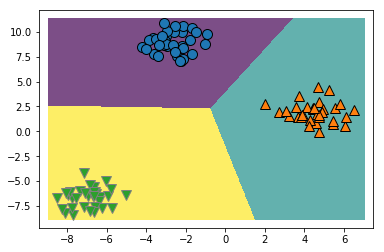

In [18]:
mglearn1.discrete_scatter(X[:,0],X[:,1],y)
plot_2d_classification_nir(linear_svm,X,alpha=0.7)

Text(0,0.5,'Feature 1')

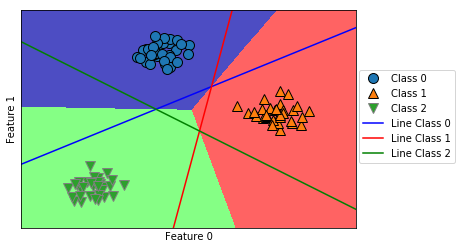

In [19]:
## Now call function from mglearn1
mglearn1.discrete_scatter(X[:,0],X[:,1],y)
mglearn1.plots.plot_2d_classification(linear_svm,X,fill=True,alpha=0.7)
line=np.linspace(-15,15)
for coef,intercept,color in zip(linear_svm.coef_,linear_svm.intercept_,['b','r','g']):
    plt.plot(line,-(line*coef[0]+intercept)/coef[1],c=color)
plt.legend(['Class 0','Class 1','Class 2','Line Class 0','Line Class 1','Line Class 2'],loc=(1.01,0.3))
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')


##  Strength, Weakness and parameters
- Main parameter is REGULARIZATION ==> alpha in Regression models and C is LinearSVC and LogisticRegression
- Large value of alpha or small value of C ==> High Regularization , less overfit ===> Simpler Model
- Another decision - L1 or L2 regularization, if we sense less features are used then better use L1 else default to L2
- L1 can be used for good interpretability
- if Data set contains large (miliions of millions of records) then investigate using solver='sag' option (Ridge and LogisticRegression)


## Method chaining
- when we call / instantiate the class and calls the method ==> Method chaining
- logrec = LogisticRegression().fit(X_train,y_train) ==> This concatenation of method is Method chaining

# Naive Bayes classifiers (Not neccessarily a Naive Bayesian)
- Its a Supervised learning model (D = ((x<sup>(1)</sup>,y<sup>(1)</sup>),(x<sup>(2)</sup>,y<sup>(2)</sup>)....(x<sup>(n)</sup>,y<sup>(n)</sup>))
- Its family of classifiers
- Its faster , price paid is the worse GENERALIZATION performance than linear classifier viz. LinearSVC, LogisticRegression
- It is so efficient because (a) look each feature and (b) collects simple per-class statistics from each feature
- Three kinds in scikit-learn (a) GaussianNB (b) BernoulliNB (c) MultinomialNB
- (a) GaussianNB - Continuous data (b) BernouliNB - binary data (text) (c) MultinomialNB - count data --like ..how any words in a sentence (text)

In [20]:
# Bernoulli: How often each feature for every class is NON ZERO
# Illustration
# We have 4 data points with 4 features and 2 classes '0','1'. We should determine how many non zero features are in each class 
# Class '0' - data point 1 and 3, and have f1= 2X'0's and 0X'NON ZERO',f2=1X0 and 0X1 and so on
# So we are basically trying to find out counts of non zero each feature in each class.
# Program below

X=np.array([[0,1,0,1],[1,0,1,1],[0,0,0,1],[1,0,1,0]])
y=np.array([0,1,0,1])

counts = {}
for label in np.unique(y):
    counts[label]=X[y==label].sum(axis=0)

print('Number of Non Zero in classes {}'.format(counts))
    

Number of Non Zero in classes {0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


- MultinomialNB - Stores avreage feature values for each class
- GaussianNB - Stores avearge and standard deviation for each feature in each class
### A new data point is compared with statistics of Multi and Gauss and best match will follow its prediction model

### Decision Tree
- Widely used model for Regression and classification
- ** Psuedo Code **
- (a) Place the best attribute of Dataset at the ROOT
- (b) Split the training set into subsets in such a way that subset contains data with the same attributes
- (c) Repeat (a) and (b) on each subset untill we reach the Leaf Nodes
- Each node either will have question/if-else or termnal node leaf
- Dataset is to be split at decision point, this continues till node contains leaf with either a value or the class
- ** Attribute selection at each Node **
- Information Gain (Attributes are Categorial)
- Gini Index (Attributes are Continuous)
- ** Overfitting **
- If we hash out each data points to the leaf then it would be overfitting. Or in another words , building the tree untill we have PURE LEAF leads to overfitiing the model
- How to remove overfitting (a) Pre Pruning - Build Tree with less depth (b) Post Pruning - Collapsing leaf having less information into better leafs
- Scikit-Learn uses only pre Pruning and not post pruning (Decision trees are implemented in the ** DecisionTreeRegressor and DecisionTreeClassifier**

In [21]:
# Lets load iris data set and train decision tree
from sklearn import tree
import pandas as pd
import graphviz
from sklearn.tree import export_graphviz
from IPython.display import display, Image
import pydotplus
from graphviz import Source

In [22]:
from sklearn.datasets import load_iris
iris=load_iris()
df=pd.DataFrame(iris.data,columns=iris.feature_names)

In [23]:
clf=tree.DecisionTreeClassifier(criterion='entropy')
clf=clf.fit(iris.data,iris.target)

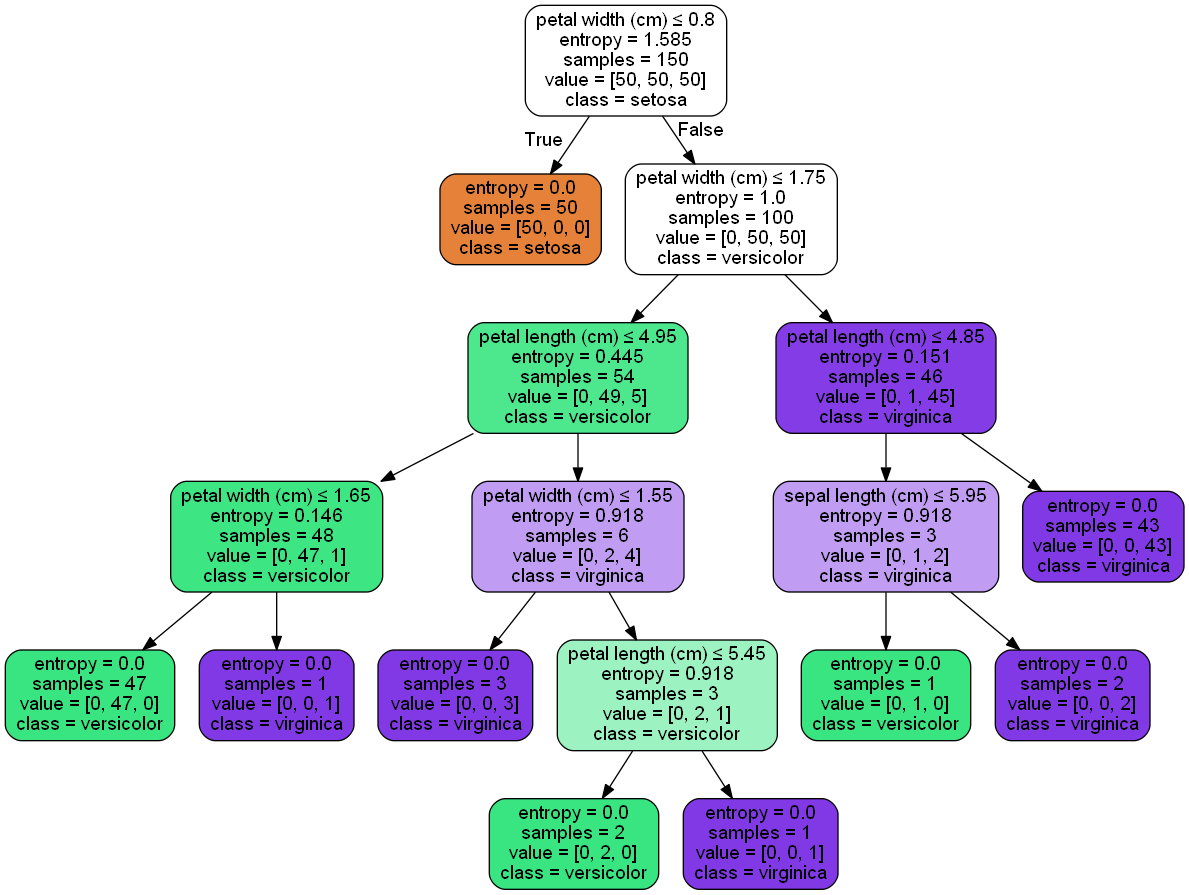

In [24]:
dot_data=export_graphviz(clf,out_file=None,feature_names=iris.feature_names,class_names=iris.target_names,filled=True,rounded=True,
                                special_characters=True)
#graph = Source(dot_data)
#graph.view() 
pydot_graph=pydotplus.graph_from_dot_data(dot_data)
Image(pydot_graph.create_png())

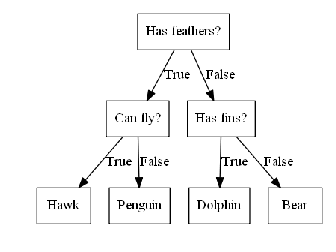

In [25]:
mglearn1.plots.plot_animal_tree()

## Test using Breast Cancer Dataset
- In the following example, we have used maximum depth of the TREE that is where model can be OVERFIT
- Its Overfit because we are taking leaf which is very clean and learned for each of the training dataset
- We can use pre pruning , in otherword, we can limit the depth of TREE by adding a DEPTH parameters

In [26]:
# Example using Breast Cancer Dataset
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [27]:
cancer = load_breast_cancer()
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=42)
tree=DecisionTreeClassifier(random_state=0)
tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [28]:
print('Training dataset result {:.2f}'.format(tree.score(X_train,y_train)))
print('Testing dataset result {:.2f}'.format(tree.score(X_test,y_test)))

Training dataset result 1.00
Testing dataset result 0.94


- In the above result, Training data set is 100% fit because we used the maximum depth and it becomes overfit MODEL
- So Training dataset is 100% but Test dataset is slightly less as 94% which isless than earlier Linear model which gave 95%
- ** We will limit the tranining model by limiting depth to 4. This means only 4 questions can be asked from the ROOT **

In [29]:
tree=DecisionTreeClassifier(max_depth=10,random_state=0)
tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [30]:
print('Training set Accuracy is - {:.3f}'.format(tree.score(X_train,y_train)))
print('Testing  set Accuracy is - {:.3f}'.format(tree.score(X_test,y_test)))

Training set Accuracy is - 1.000
Testing  set Accuracy is - 0.937


- ** This has improved Test but training set scored less, Meaning we not overfitting and that should be ok **

## Visualize the TREE

In [31]:
export_graphviz(tree,out_file='tree.dot',class_names=cancer.target_names,feature_names=cancer.feature_names,impurity=False,
                filled=True)

In [32]:
## This code somehow doesn't work
with open('tree.dot') as f:
    dot_graph=f.read()
graphviz.Source(dot_data)

In [33]:
X_train.shape

(426, 30)

In [34]:
dot_data = export_graphviz(tree,out_file=None,class_names=cancer.target_names,feature_names=cancer.feature_names,
                           impurity=False,filled=True)

In [35]:
## Some analysis for Decision Tree 
df=pd.DataFrame(X_train,columns=cancer.feature_names)
#df=df.assign(Class=cancer.target_names[y_train])
df['Class']=cancer.target_names[y_train]
df.groupby(['Class']).count()
#df[['mean radius','Class']]
#df.head(100)
#df['Çlass']=cancer.target_names[y_train]
#df=df[df['worst radius']<=16.795].groupby('Class').count()
#df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
Class,,,,,,,,,,,,,,,,,,,,,
benign,267,267,267,267,267,267,267,267,267,267,...,267,267,267,267,267,267,267,267,267,267
malignant,159,159,159,159,159,159,159,159,159,159,...,159,159,159,159,159,159,159,159,159,159


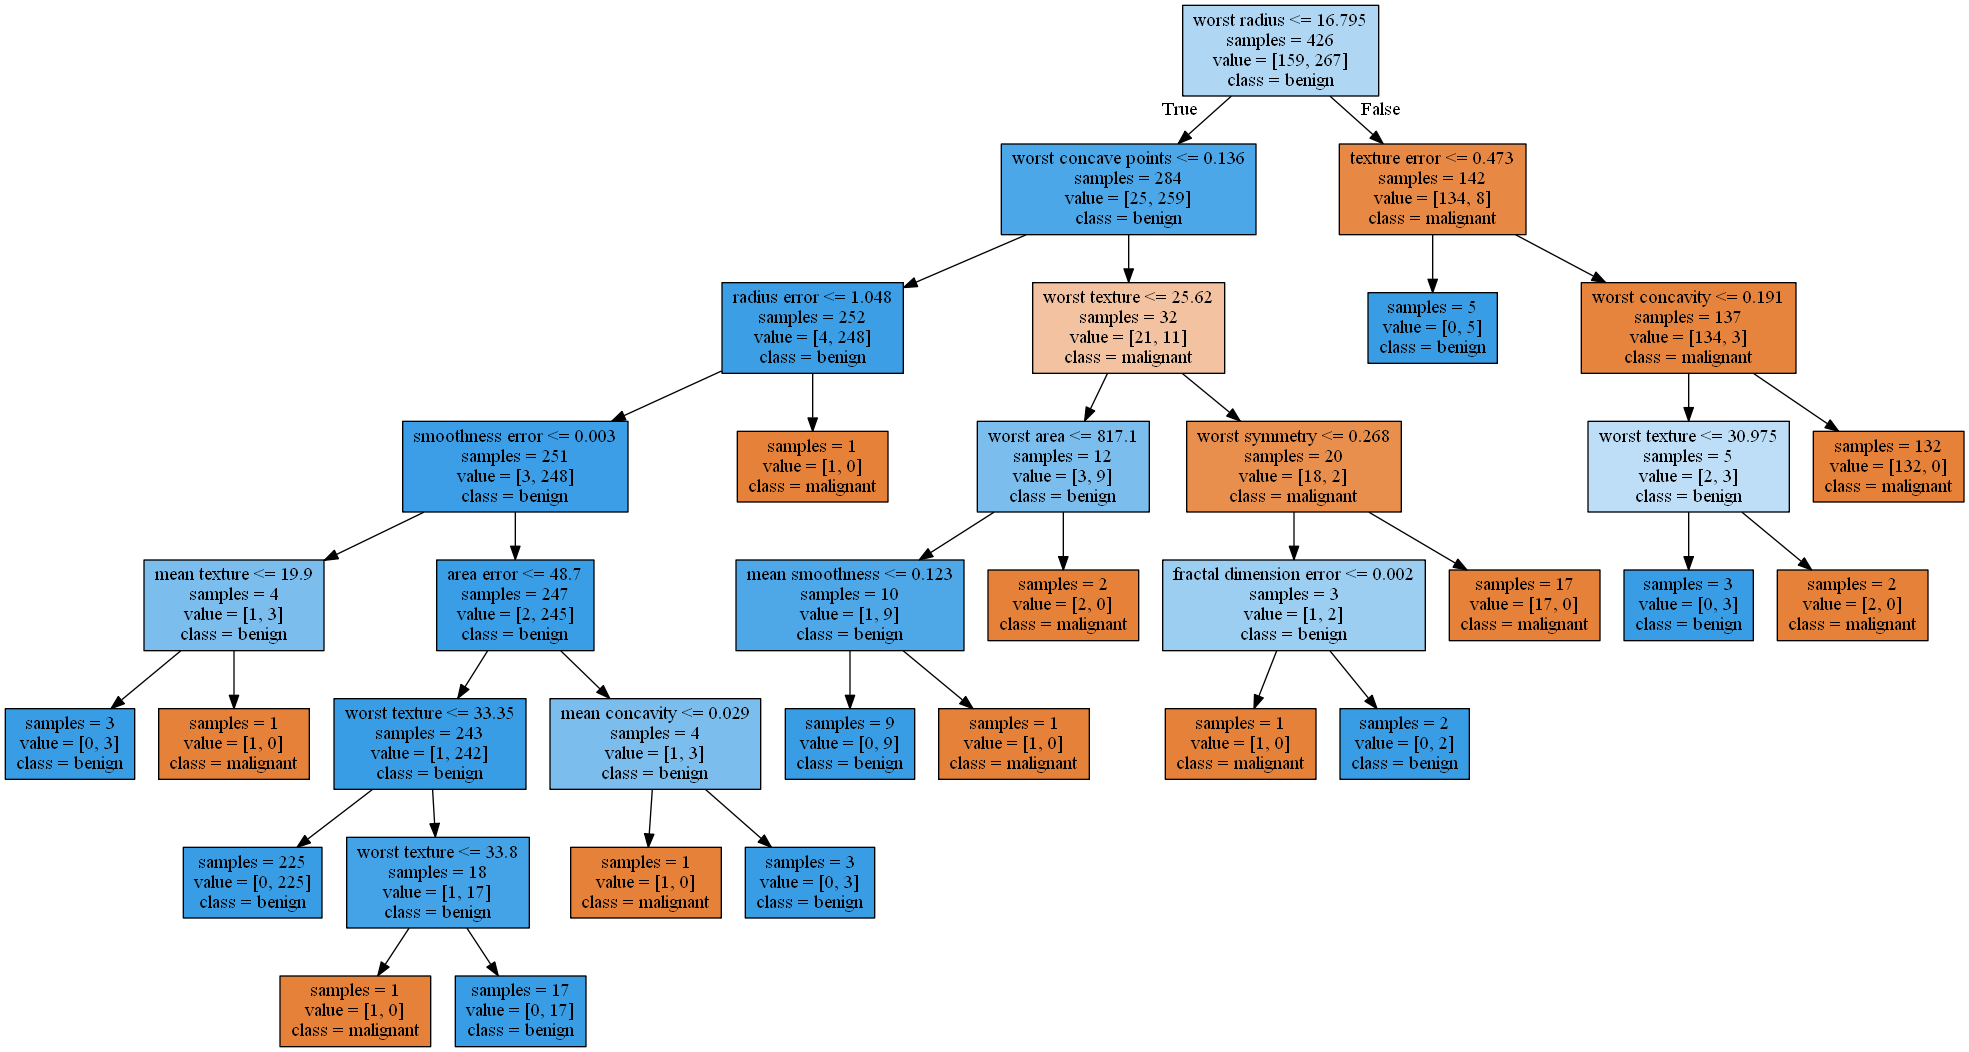

In [36]:
# Alternate Code using IMAGE to display Graph
dot_graph=pydotplus.graph_from_dot_data(dot_data)
Image(dot_graph.create_png())

## Feature Importance 
- What is the importance weightage of each Attributes
- Gini Index or Entropy runs the calculation to derive weightage for attributes before deciding NODEs and spliting there on
- Lets plot a bar chart across each attributes

In [37]:
print('Feature importances :\n{}'.format(tree.feature_importances_))
print('\nMaximum weightage is - {} at index - {} and name is {}'.format(tree.feature_importances_.max(),
        np.argmax(tree.feature_importances_),cancer.feature_names[np.argmax(tree.feature_importances_)]))

Feature importances :
[0.         0.00752597 0.         0.         0.00903116 0.
 0.00752597 0.         0.         0.         0.00975731 0.04630969
 0.         0.00238745 0.00231135 0.         0.         0.
 0.         0.00668975 0.69546322 0.05383211 0.         0.01354675
 0.         0.         0.01740312 0.11684357 0.01137258 0.        ]

Maximum weightage is - 0.6954632181471274 at index - 20 and name is worst radius


In [38]:
def plot_feature_importance_cancer(model):
    plt.figure(figsize=(10,5))
    plt.barh(np.arange(cancer.feature_names.shape[0]),model.feature_importances_,align='center')
    plt.yticks(np.arange(cancer.feature_names.shape[0]),cancer.feature_names)
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')

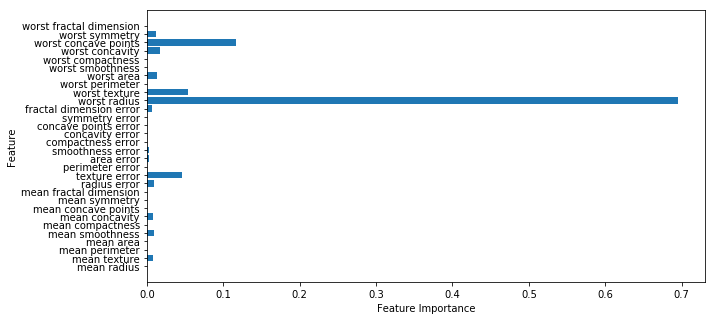

In [39]:
plot_feature_importance_cancer(tree)

Feature importances: [0. 1.]


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

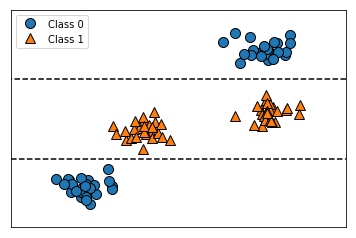

In [40]:
mglearn1.plots.plot_tree_not_monotone()
display(tree)

In [41]:
X,y=make_blobs(centers=4,random_state=4)
np.unique(y)

array([0, 1, 2, 3])

## Practice to create discrete 2d view

In [42]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import colorConverter

- Create blobs with 4 centers
- Enforce Y to 2 classes --Reason being , we want to test attribute doesn't have relationship with the result
- Use matplotlib features to display X[0],X[1] with class in y
- draw separation lines

<IPython.core.display.Javascript object>


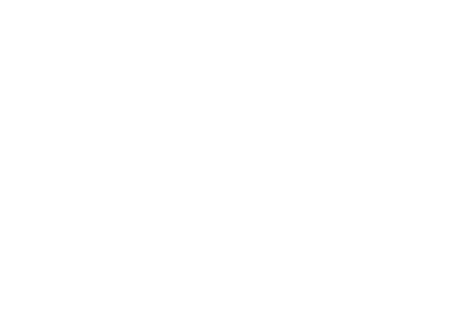

<IPython.core.display.Javascript object>


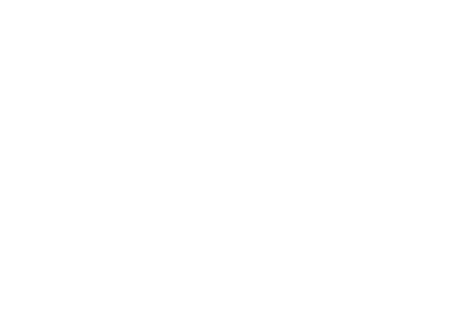

In [43]:
#%matplotlib inline
%matplotlib notebook
####################################################################################
#Plot 2 dimesnional data points having 2 features and 2 class using MatplotLib
############################################################################
X,y=make_blobs(centers=4,random_state=8)
y=y%2
padding =0.0
line =[]
labels=np.unique(y)
markers=['o','^','v']*10

tree=DecisionTreeClassifier(random_state=0).fit(X,y)

fig, ax = plt.subplots()
#fig=plt.figure(1,figsize=(10,5))

current_cycler=mpl.rcParams['axes.prop_cycle']
for i,(yy,cycle) in enumerate(zip(np.unique(y),current_cycler())):
    mask=(y==yy)
    color=cycle['color']
    if np.mean(colorConverter.to_rgb(color))<0.4:
        markeredgecolor = 'grey'
    else:
        markeredgecolor = 'black'
        
    line.append(plt.plot(X[:,0][mask],X[:,1][mask],markers[i],markersize=10,label=labels[i],
                         c=color,markeredgecolor=markeredgecolor)[0])

pad1=X[:,0].std()*padding
pad2=X[:,1].std()*padding

ax=plt.gca()

xlim=ax.get_xlim()
ylim=ax.get_ylim()
ax.set_xlim(min(X[:,0].min()-pad1,xlim[0]),max(X[:,0].max()+pad1,xlim[1]))
ax.set_ylim(min(X[:,1].min()-pad2,ylim[0]),max(X[:,1].max()+pad2,ylim[1]))
ax.legend(['class 0','class 1'],loc='best')

#%config InlineBackend.close_figures = False


In [44]:
#########################################################
#### Create Separation between classes
# 1. Create 1000+ points in the meshgrid
# 2. Gather all two points coordinates
# 3. Run through the classifier and get probability or DECISION Value
# 4. Use Contour to get TOP view --> That will draw sepaation lines
#####################################################
eps=0
x_min, x_max = X[:,0].min()-eps, X[:,0].max()+eps
y_min,y_max=X[:,1].min()-eps,X[:,1].max()+eps
xx,yy=np.linspace(x_min,x_max,1000), np.linspace(y_min,y_max,1000)
X1,X2=np.meshgrid(xx,yy)
X_grid=np.c_[X1.ravel(),X2.ravel()]
decision_values=tree.predict_proba(X_grid)[:,1]
levels=[0,0.5,1]
ax.contour(X1,X2,decision_values.reshape(X1.shape),levels=[0,0.5,1],linestyles="dashed",zorder=5)

<IPython.core.display.Javascript object>


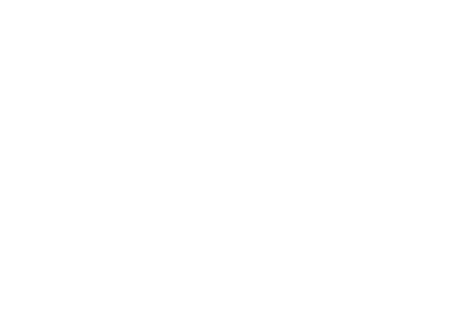

(array([[1, 2, 3, 4],
        [1, 2, 3, 4],
        [1, 2, 3, 4]]), array([[11, 11, 11, 11],
        [12, 12, 12, 12],
        [13, 13, 13, 13]]), array([[10,  9,  8,  7],
        [11, 10,  9,  8],
        [12, 11, 10,  9]]))

<IPython.core.display.Javascript object>


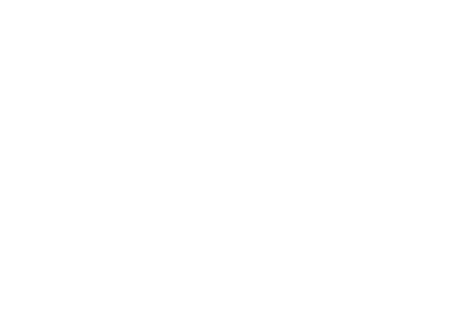

In [45]:
##########################################
#### Practice Contour in another figure
##########################################

fig, ax = plt.subplots()
a=[1,2,3,4]
b=[11,12,13]
A,B=np.meshgrid(a,b)
ax.contour(A,B,(B-A).reshape(B.shape),levels=[8,9,10,11,12],zorder=5)
A,B,B-A


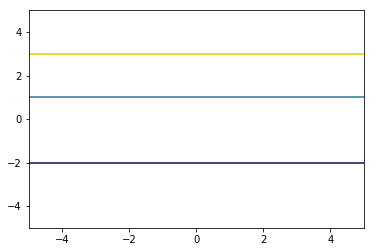

In [46]:
#%matplotlib notebook
%matplotlib inline
### Another example F(x,y) = X^^2 + y^^2
fig,ax=plt.subplots()
x=np.linspace(-5,5,1000)
y=np.linspace(-5,5,1000)
X,Y=np.meshgrid(x,y)
#ax.contour(X,Y,((X**2)+(Y**2)),levels=[3,4,5,6,20,30,40])
Z=np.array([0]*300000 +[1]*300000+[1.5]*200000+[2.5]*200000)
ax.contour(X,Y,Z.reshape(X.shape))

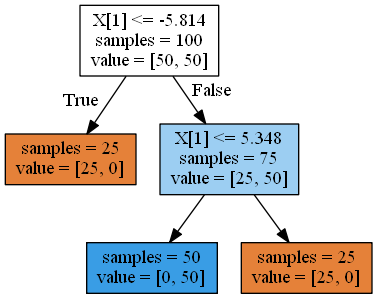

In [47]:
##############################################################
#### Visualize the TREE ######################################
##############################################################
# 1. Get a trained TREE Model
# 2. Export Tree model in a DOT File 'dot_data' - use export_graphviz function
# 3. Use PYDOTPLUS.graph_from_dot....function to convert graph
# 4. Use Image function from display library to display GRAPH
dot_data = export_graphviz(tree,out_file=None,impurity=False,filled=True)
dot_graph=pydotplus.graph_from_dot_data(dot_data)
Image(dot_graph.create_png())

In [48]:
from sklearn.datasets import data
import pandas as pd

In [49]:
ram_price= pd.read_csv("data/ram_price.csv")

In [50]:
ram_price.columns

Index(['Unnamed: 0', 'date', 'price'], dtype='object')

Text(0,0.5,'Price in $/Mbyte')

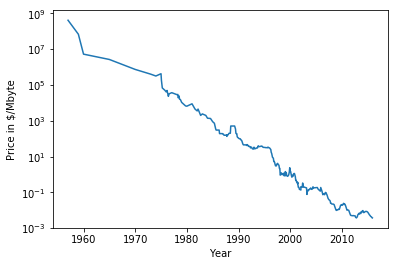

In [51]:
%matplotlib inline
plt.semilogy(ram_price.date,ram_price.price)
plt.xlabel('Year')
plt.ylabel('Price in $/Mbyte')

## Use and compare RAM price regression using Linear Rehression and Decision Tree Regresion
- Take 2000 as point between training dataset and testing dataset 
- Train the model using Linear and decision Tree with dataset upto 2000
- Test the model beyond 2000
- Compare both the model

In [52]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [53]:
data_train=ram_price[ram_price.date<2000]
data_test=ram_price[ram_price.date>=2000]

In [54]:
# We strip off date as X_data points, Scale out price 'y' using logarithm
X_train=data_train.date[:,np.newaxis]
y_train= np.log(data_train.price[:,np.newaxis])
df=pd.DataFrame(X_train,columns=['X'])
df['y']=y_train

In [55]:
tree=DecisionTreeRegressor().fit(X_train,y_train)
linear_reg = LinearRegression().fit(X_train,y_train)

In [56]:
# Predict on all data
X_all=ram_price.date[:,np.newaxis]

In [57]:
pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

In [58]:
# UNDO log-transform
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

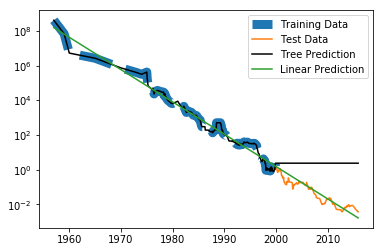

In [59]:
%matplotlib inline
# Draw the plot and compare between Decision Tree and Linear Regression
plt.semilogy(data_train.date,data_train.price,label='Training Data',ls='dashed',lw=9)
plt.semilogy(data_test.date,data_test.price,label='Test Data')
plt.semilogy(ram_price.date,price_tree,label='Tree Prediction',c='black')
plt.semilogy(ram_price.date,price_lr,label='Linear Prediction')
plt.legend()

** There is a funny correlation between Linear Regression and Decision Tree Regression **
- In Linear Regression alogorithm that learns the whole training datset and predicts lineraly
- In Decision Tree , in the regression algorithm, though it trys to learn the whole data set and learns exactly the training dataset so roduces the same RESPONSE upto training dataset set 
- ** Limitation using Decision TREE regression **
- But while predicting it takes takes the last response as the response for remainining dataset set/Test Data Set. It doesn't generate the new RESPONSE otherthan what it has seen while learning with the TRAINING DATASET


- ** Pros and Cons of Decision Support Tree **
- ** PROS **
- No Need to NORMALIZATION or Standardization as pre processing of data , since data split takes place solely upon its own attributes
- Ideal for features with different scaling range 
- Easy to VISUALIZE 
- ** CONS **
- Even with Pre Pruning Decision TREE tend to OVERESTIMATE

## Ensembles of Decision Trees
- Method to combine multiple ML models to create more powerful model
- Two ENSEMBLE methods proven to be effective in REGRESSION and CLASSIFICATION in wide ramge of datasets
- (A) RANDOM FOREST and (B) GRADIENT BOOSTED Decision tree

- ** Random Forests **
- To overcome the cons of overfitting of MODELS
- Each tree does differently from others
- Each tree does better job of predicting
- Average is lot better than individual
- Reduce overfitting by averaging the results from different TREES
- ** Implementation Strategy **
- Bring randomness either by selecting different data points in building TREES OR (B) choosing features while splitting the NODES

### How to build Random Forest
- Inject Randomness while creating trees in the forest
- (a) **Boostrap method** - Randomly selects datapoints from n_sample with replacement options to an extent of same size as n_sample. Its possible that some datapoints are repeated while some are not in the final list. This introduces 1st level of RANDOMNESS (b) Each tree is built from the sampled dataset following method below :- Algorithm selects few features from all available features and Nodes are split according to that list. Set ** max_Features ** to number of features from the available list.
- For Regression : Take the average of all TREES and For Classification - Probabilities predicted by all TREES are avearged and the class with maximum probability is predicted

### Analyzing Random Forest

In [60]:
import mglearn1

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
from matplotlib.colors import ListedColormap
from scipy import ndimage,misc

In [62]:
cm2=ListedColormap(['#0000aa', '#ff2020'])

In [63]:
X,y = make_moons(n_samples=100,noise=0.25,random_state=5)
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,random_state=42)
forest = RandomForestClassifier(n_estimators=5,random_state=2)
forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

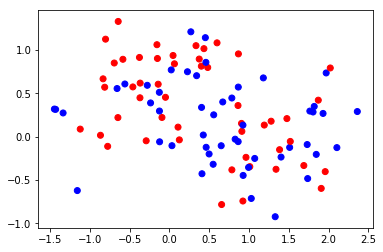

In [64]:
%matplotlib inline
plt.scatter(X[:,0],X[:,1],c=['b','r'])

## Visualization of Forest
- 5 Decision Trees
- forest is the aggregation of all decision Tree values

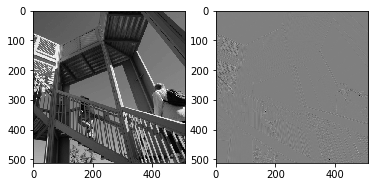

In [65]:
########################################
## Learn Laplace , ndimage function 
########################################
fig = plt.figure()
plt.gray()
ax1=fig.add_subplot(121)
ax2=fig.add_subplot(122)
ascent=misc.ascent()
result=ndimage.laplace(ascent)
ax1.imshow(ascent)
ax2.imshow(result)

In [66]:
# Practice to create TREE PARTITION
def plot_tree_partition_nir(X,y,tree,ax=None):
    eps=X.std()/2
    x_min,x_max=X[:,0].min()-eps,X[:,0].max()+eps
    y_min,y_max=X[:,1].min()-eps,X[:,1].max()+eps
    xx=np.linspace(x_min,x_max,1000)
    yy=np.linspace(y_min,y_max,1000)
    X1,X2=np.meshgrid(xx,yy)
    X_grid=np.c_[X1.ravel(),X2.ravel()]
    Z=tree.predict(X_grid)
    Z=Z.reshape(X1.shape)
    
    faces = tree.apply(X_grid)
    faces = faces.reshape(X1.shape)
    border = ndimage.laplace(faces) !=0
    
    ax.contourf(X1,X2,Z,alpha=0.4,cmap=cm2,levels=[0,0.5,1])
    ax.scatter(X1[border],X2[border],marker='*',s=2)
   # ax.scatter(X[:,0],X[:,1],c=y,marker='^',edgecolors='b')
    mglearn1.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
    ax.set_xlim(x_min,x_max)
    ax.set_ylim(y_min,y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    

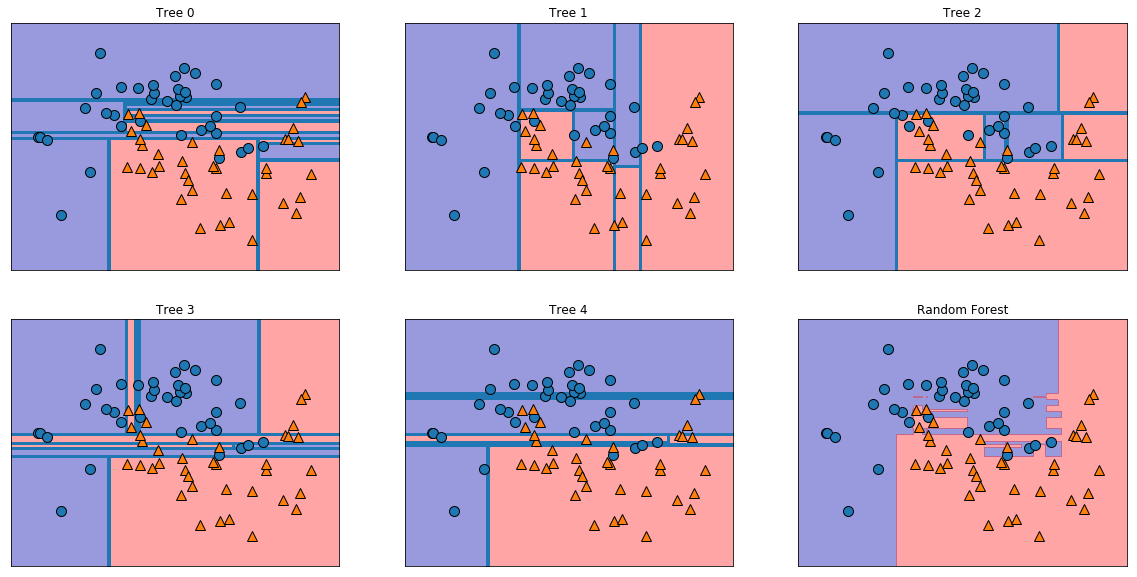

In [67]:
# 1. Draw figure with 2X3 axes
# 2. Plot tree stored in estimators
# 3. Draw partitition
# 4. Run the same steps for all trees in the estimators
# 5. Run 2d Separator in the FOREST model - Aggregated view
# 6. Run discrete scatter plot for all data points X[0], X[1]
%matplotlib inline
fig, axes = plt.subplots(2,3,figsize=(20,10))
for i, (ax,tree) in enumerate(zip(axes.ravel(),forest.estimators_)):
    ax.set_title('Tree {}'.format(i))
    plot_tree_partition_nir(X_train,y_train,tree,ax=ax)

mglearn1.plots.plot_2d_separator(forest,X_train,fill=True,ax=axes[-1,-1],alpha=0.4)
axes[-1,-1].set_title("Random Forest")
mglearn1.discrete_scatter(X_train[:,0],X_train[:,1],y_train)


- ** Above picture : We have used 5 Trees in the forest. Each decision boundary learned by the sampled BOOTSTRAPPED dataset has spe error, since data set is sampled from the training dataset , some datapoints may have been repeated and some may not have been included. So we can see some errors. The Forest is the average of all individual tree so OVERFITTING is less ** 
- ** In Real world application we can see more TREES , upto hundreds or THOUSANDS will lead to even smoother boundaries **

## <span style="color:blue">Example - Use 100 Trees upon Breast Cancer dataset</span>

In [68]:
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,random_state=0)
forest=RandomForestClassifier(n_estimators=100,random_state=0)
forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [69]:
print("Training set accuracy :{:.3f}".format(forest.score(X_train,y_train)))
print("Testing set accuracy  :{:.3f}".format(forest.score(X_test,y_test)))

Training set accuracy :1.000
Testing set accuracy  :0.972


### <span style="color:red">Feature imoratnce of forest is the average feature importance of all trees - More Reliable</span>

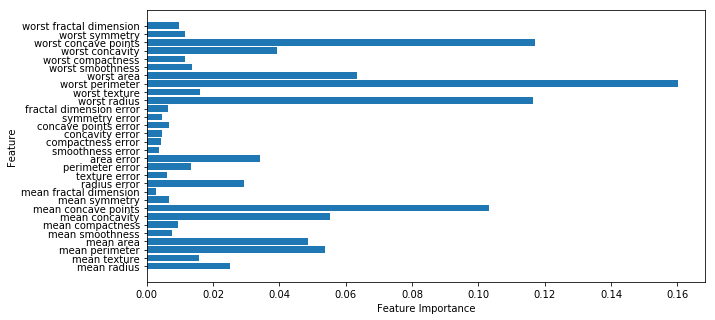

In [70]:
plot_feature_importance_cancer(forest)

### Strength, Weakness and Parameters
- Random forest most widely used for Regression and Classification
- Performs well even without heavy tuning of parameters and without scaling of data
- Random forest shares all benefits of DT while making up for some deficiencies
- ** Decision Tree (DT) can still be used for compact representation for decision making process **
- Random forrest is time consuming when craeting for hundreds and thousands of tree, can overcome the slowness by using multicores parallel in Computer. use n_job = -1 to consume all Cores
- ** Random forest don't tend to perform well for high dimensional, sparse data set such as TEXT DATA **
- For High DIM. and Sparse dataset, its better to use LINEAR MODEL
- RANDOM Forest runs slower to TRAIN and PREDICT as Compared to LINEAR, but can be addressed to some extent using multi core
- IMPORTANT Parameters = n_estimators, max_features, pre Pruning options like max_depth, less LEAF Nodes
- Rule of THUMB, max_feature = sqrt(n_features) --if calssifier, log2(n_features) if regressor

## <span style="color:brown">Gradient Boosted Regression Tree (Gradient boosting machines)</span>

### Properties :-
- Model is learned from previous decision tree
- DTs are shallow , so training and prediction is faster
- Widely used in the INDUSTRY
- More sensitive to the PARAMETERS
- Important parameters = n_ensemble, pre_prunning and ** learning_rate **
- ** Learning Rate - How strongly DT is to learn from the previous mistake , Higher Leraning Rate ==> Stronger Correction **
- Model is will be more complex if (a) Learning Rate is high (b) n_estimator is high

### <span style="color:red">Example : Train the model for Breast Cancer using Gradient Boosting Classifier</span>

In [71]:
from sklearn.ensemble import GradientBoostingClassifier

In [72]:
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,random_state=0)
gbrt=GradientBoostingClassifier(random_state=0)

In [73]:
gbrt.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False)

In [74]:
print("Training set accuracy = {:.3f}".format(gbrt.score(X_train,y_train)))
print("Testing set accuracy =  {:.3f}".format(gbrt.score(X_test,y_test)))

Training set accuracy = 1.000
Testing set accuracy =  0.958


In [75]:
# Reduce Overfitting by applying pre Prunning either by (a) limiting max depth or (b) lower learning rate
gbrt=GradientBoostingClassifier(random_state=0,max_depth=1)

In [76]:
gbrt.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=1,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False)

In [77]:
print("Training set accuracy = {:.3f}".format(gbrt.score(X_train,y_train)))
print("Testing set accuracy  = {:.3f}".format(gbrt.score(X_test,y_test)))

Training set accuracy = 0.991
Testing set accuracy  = 0.972


In [78]:
# Use Learning Rate to generalize Gradient Boosting Algorithm
gbrt=GradientBoostingClassifier(random_state=0,learning_rate=0.01,max_depth=2)
gbrt.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=2,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False)

In [79]:
print("Training Accuracy is {:.3f}".format(gbrt.score(X_train,y_train)))
print("Testing  Accuracy is {:.3f}".format(gbrt.score(X_test,y_test)))

Training Accuracy is 0.974
Testing  Accuracy is 0.965


* Methods (a) max_tree (b) Learning rate are used to reduce the complexity of the model *
* High Learning Rate ==> Making strong effort to learn from the previous step, will lead to overfitting *
* max_tree and max_tree_leaf can also be used to reduce overfitting *

## <span style ="color:green">Feature Importance </span>

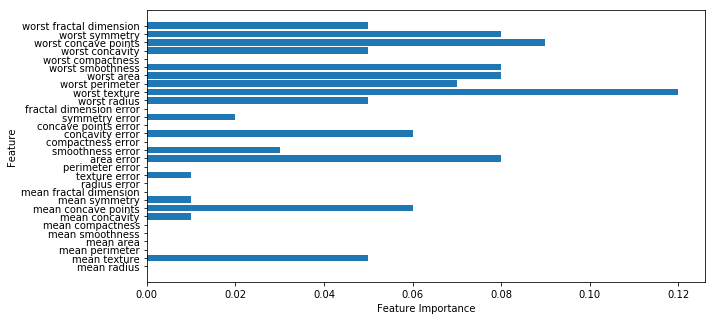

In [80]:
gbrt = GradientBoostingClassifier(random_state=0,max_depth=1)
gbrt.fit(X_train,y_train)
plot_feature_importance_cancer(gbrt)

** xgboost : ** If we want to apply GRADIENT BOOSTING to the large scale dataset then xgboost package with its PYTHON interface can be used

## <span style = "color:purple">Strength, Weakness and Parameters</span>
- Gradient boosted decision tree is amongst the most powerful and widely used model for supervised learning 
- Long time to train while tuning up the parameters carefully
- Don't need SCALING of any attributes like other DECISION TREE (worked well in the mixsture of binary and continuous data)
- Doesn't work well in high dimensional SPARSE data
- Main parameters = max_tree,n_estimators, learning_rate, max_leaf
- 2 parameters highly interconnected ..lower learning_rate leads to high n_estimators (more trees) to learn from the mistakes and train
- CONTRAST with RANDOM FOREST ==> RF -> high n_estim.. is good but in GB --> leads overfit or complex model, common practice is to fit n_estim..depending upon TIME and MEMORY budget , then SEARCH over diff LEARNING RATE

# Support Vector Machine
- Arguably the most succesful and powerful classification algortithm
- Definition: SVMs vs SVM (What does Wikipedia say) https://en.wikipedia.org/wiki/Support-vector_machine
- SVMs = Supervised learning Model with associated algorithms that analyze data used for classificaion and regression.

## SVMs : Used for 2 things 
- SVM for Classification
- SVR for Regression'

## SVM Chronology 
- Maximum Margin Classifier (VC 1951 -> Kernel Trick (1992) ->Soft MArgin Classifier (1995) -> Soft Margin Kernel


In [ ]:
Image(filename='E:/Niraj/Niraj Personal/Business/Blog Related pictures/SVM/General/ML Model.jpg',width=700)

# Maths behind SVM
- Supervise learning Model (Need labeled DataSet)
- eMails (SPAM vs Clean), Customer complaints vs. appreciation
- Algorithm + Data ====> Model

## Classifier or HyperPlane : Point in 1D, Line in 2D , Plane in 3D, Hyperplane in multi D

## Best Classifier : 
- Maximum Margin
- Best Generalizer

## How to Find Best Classifier or Optimal Separting Hyperplane


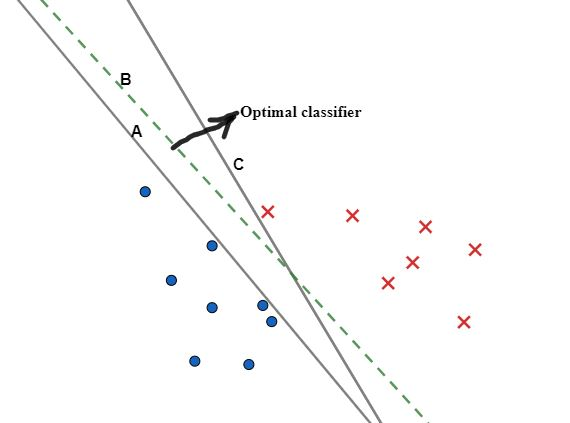

In [82]:
Image(filename='E:/Niraj/Niraj Personal/Business/Blog Related pictures/SVM/SVM2/classifier.jpg',width=300)

# Optimal Hyperplane

- Determine Maximum Margin , but what is margin

## <span style='color:red'> Margin </span>

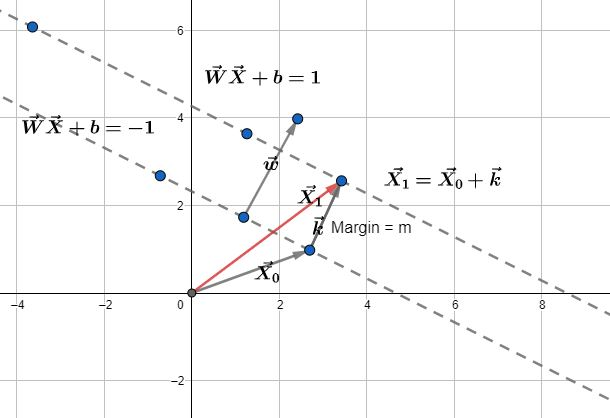

In [83]:
Image(filename='E:/Niraj/Niraj Personal/Business/Blog Related pictures/SVM/SVM2/margin.jpg',width=500)

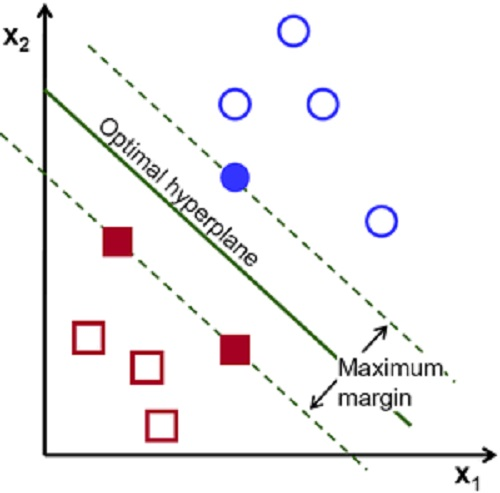

In [84]:
Image(filename='E:/Niraj/Niraj Personal/Business/Blog Related pictures/SVM/SVM1/SVM2.jpg',width=200)

# <span style='color:blue'>How to determine the maximum margin classifier </sapn>
- Vectors and Vector calculation
- norm, length, addition, substraction
- dot Product and projection: $\vec w$
- Equation of line : y = mx+c
- Diff Representation of the Equation of line : $w^{t}x+b$
   
## <span style='color:green'>**why do we use this representation**</span>
- **w** is orthogonal to the plane and
- This can work for many dimensions 

# Calculate margin intutively
- get 2D linearly separable data set
- determine the classes
- draw two parallel lines touching the extreme datapoints facing other class
- Gradualy maximize  this distance
- Explain through fig

# <span style='color:red'>Let's D be our data set with following characterstics in set theory</span>
- $D=\left\{ \left( x_{i},y_{i}\right) s\cdot t\cdot x_{i}\in \mathbb{R} ^{p},y_{i}\in \left\{ -1,+1\right\} \right\} _{i=1}^{n}$
- For visulaization sake , lets say p =2
- Assume this datset D is linearly separable 
- Select two Hyperplanes of (lines in this case of 2D)


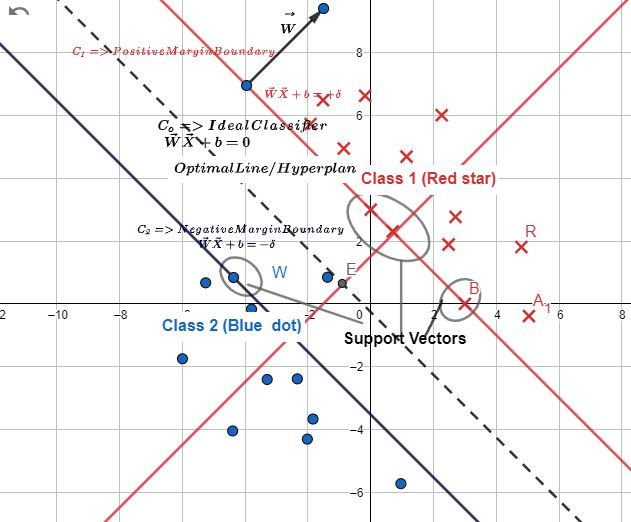

In [85]:
Image(filename='E:/Niraj/Niraj Personal/Business/Blog Related pictures/SVM/SVM2/math.jpg',width=600)

# Calculation
- From above figure , let's calculate m using vector method
- $H_o => \vec{W}\vec{X} +b = 0 $
- $H_1 => \vec{W}\vec{X_1} +b = +\delta$ (Red line)
- $H_2 => \vec{W}\vec{X_2} +b = -\delta$ (Blue line)

# Calibrate the margin lines so that $\delta = 1$
- $H_1 => \vec{W}\vec{X_1} +b = +1$ (Red line)
- $H_2 => \vec{W}\vec{X_2} +b = -1$ (Blue line)

# Calculate m = margin geometerically - fig. above
- Let's assume $x_0$ is in $H_2$ and $z_0$ is in $H_1$
- Apply vector calculation 
$\vec w.z_{0}+b=+1\\
\vec w \cdot \left( x_{0}+\vec k\right) +b=+1\\
\vec wx_{0}+b+w\vec k=+1\\
\vec w\vec k=2 \ (\overrightarrow {k}=\dfrac {m\overrightarrow {w}}{\left\| \overrightarrow {w}\right\| })\\
m\cdot \dfrac{w^2}{||w||}=2\\
\therefore m = \dfrac{1}{||w||}
$

## <span style='color:red'> Marginal distance is inverse to the value of w, i.e maximum margin can be achived by having minimal w </span>

## What is the optimization problem 
- Optimization Problem : Problem of solving the best solution out of all feasible solutions ..Wikipedia <href = https://en.wikipedia.org/wiki/Optimization_problem>
- $\min \dfrac {1}{2}\left\| w^{2}\right\| \\
s.t.\ y_{i}\left( \left( w\cdot x_{i}\right) +b\right) \geq 1\ \forall i\in \left( 1..m\right) \
$

## <span style='color:red'> Constrained Optimization Problem</span>
## Introduce Lagrange Multiplier $\alpha_i \ge 0,\ \forall i\in \left(1..m\right)$
$L\left( w ,b,\alpha \right) =\dfrac {1}{2}\left\| w^{2}\right\| -\sum ^{m}_{i=1}\alpha _{i}\left( y_{i}\left( \left( w \cdot x_{i}\right) +b\right) -1\right) 
$

## At the extrema, we take partial derivatives as 0 as following:-
$ \begin{aligned}\dfrac {\partial }{\partial b}L\left( w ,b,\alpha \right) =0\\ \dfrac {\partial }{\partial \omega }L\left( w ,b,\alpha \right) =0\end{aligned}
$

## After the calculation, we arrive at:-

$\begin{aligned}\sum ^{m}_{i=1}\alpha _{i}y_{i}=0\\
w=\sum ^{m}_{i=1}\alpha _{i}y_{i}x_{i}\end{aligned}
$


# <span style='color:red'></span>

# What is Unconstrained Optimization (Minimization)
- f(x) is twice differentiable function 
- f(x) continuous
- $\nabla f\left( x^{\ast }\right) =0\\
if\ \nabla^2 f\left(x^{\ast }\right)\ is\ positive\ definite\ then\ x^ {\ast}is\ local\ minimum$

# More Formally theorem
1. If at $x= x^{\ast }\ \nabla f\left( x^\ast \right) = 0$ and
2. Hessian matrix of f at $x=x^{\ast }$ is positive definite 
- **what is Hessian Matrix**

## Hessian Matrix = H##
- Local curvature of function with many variables

$\nabla ^{2}f\left( x\right) =\begin{bmatrix} \dfrac {\partial ^{2}f}{\partial x_{1}^2}\ldots \dfrac {\partial ^{2}f}{\partial x_{1}\partial x_{n}} \\ \dfrac {\partial ^{2}f}{\partial x_{n}\partial x_{1}}\ldots \dfrac {\partial ^{2}f}{\partial x_{n}^{2}} \end{bmatrix}$

- ** Hessian Matrix (H) is Positive definite , if the following condition takes place **   
- A is a positive definite matrix if $x^TAx \gt\ 0\ , \forall x\in \left(1,n\right)$

- $z^{T}( \left( \nabla ^{2}f\left( x^{\ast }\right) \right) z >0,\forall z\in R^{n}$

## <span style='color:brown'>Other Method to determine if H is positive definite</span>
- **Leading Principal Minors should be POSITIVE **

$A=\begin{bmatrix} a & b & c \\d & e & f \\g & h & i\end{bmatrix}$

- **Leading Principal Minors are the following:-**

$D_1=a\\
D_2=ae-bd\\
D_3=aei+bfg+cdh-ceg-bdi-sfh$

## Compute all Leading Principal Minors at $x= X^*$

- If it is positive for its all leading principal minors then we have got local minima at $x=x^*$


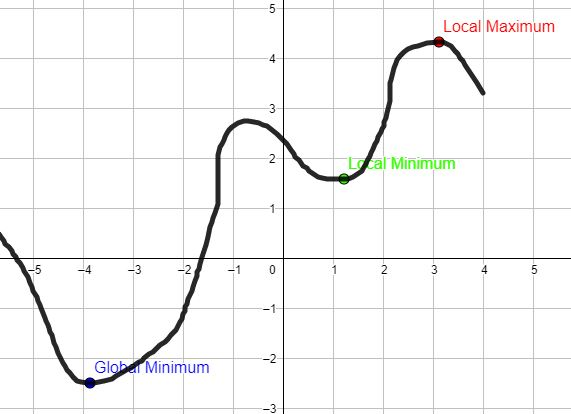

In [118]:
Image(filename='E:/Niraj/Niraj Personal/Business/Blog Related pictures/SVM/SVM2/minima.jpg',width=600)

# How to find Global Minimum and CONVEX Function
- If the function is CONVEX then local mimimum = GLOBAL minimum
- Figure below - CONVEX and NON CONVEX , how?
- global vs local , select the range 
- A function is a CONVEX if set of points above the function is in CONVEX SET

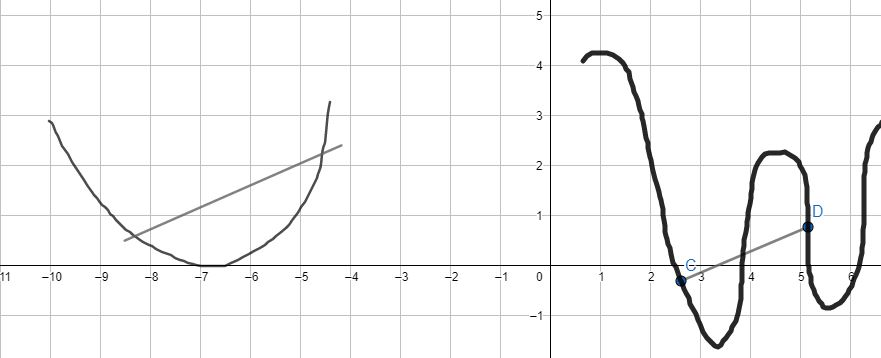

In [119]:
Image(filename='E:/Niraj/Niraj Personal/Business/Blog Related pictures/SVM/SVM2/convex.jpg',width=600)

# Function with many variables - How to find its Convexity
- Function is continuous 
- Function is double differentiable
- H = Hessian Matrix is POSITIVE SEMIDEFINITE (On the interior of CONVEX SET)
## POSITIVE SEMIDEFINITE is Equivalent to
- All Principal Minors (Not only leading principal minors) are greater than or equal to 0

# Duality & Lagrange Multiplier


## <span style="color:red">Kernelized Support Vector Machines</span>
- Its extension of Linear Support Vector Machines (referred as SVMs)
- Used for complexed MODELS, not defined simply by HYPERPLANES in the I/P Space
- We will restrict ourselves for classification though can be used for SVR and SVC
- Math behind => Andrew Ng video , Map X features (n dim) to different Feature Set (m - dim), Generally m>>n, apply Gaussian, Linear Kernel 

### Linear Models and Non Linear Features
- Previously , we have seen with synthetic blobs data 2 D features set doesn't estimate good in LINEAR MODEL. Linear model can be quite limiting in low dimensional space (LINES and HYPERPLANE have limited flexibilities)
- How to make LINEAR MODEL more FLEXIBLE ==> add more features (adding interaction or POLYNOMIALS of the INPUT features
- <strong>Illustrations :-</strong>

Text(0,0.5,'Feature 1')

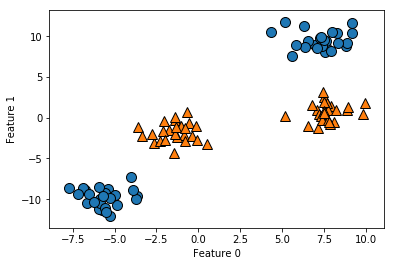

In [86]:
X,y =make_blobs(centers=4,random_state=8)
y=y%2
myFunc.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

In [87]:
def plot_2d_separator_nir(classifier,X,ax=None,fill=False,eps=None,alpha=1,cmap=cm2,linewidth=None,threshold=None,
                          linestyle="solid"):
    if eps is None:
        eps=X.std()/2
        
    if ax is None:
        ax=plt.gca()
    
    x_min,x_max= X[:,0].min()-eps,X[:,0].max()+eps
    y_min,y_max= X[:,1].min()-eps,X[:,1].max()+eps
    
    xx=np.linspace(x_min,x_max,1000)
    yy=np.linspace(y_min,y_max,1000)
    
    X1,X2=np.meshgrid(xx,yy)
    X_grid=np.c_[X1.ravel(),X2.ravel()]
    
    decision_values=classifier.decision_function(X_grid)
    levels=[0] if threshold is None else [threshold]
    
    fill_levels = [decision_values.min()]+[levels]+[decision_values.max()]
    
    if fill:
        ax.contourf(X1,X2,decision_values.reshape(X1.shape),levels=fill_levels,alpha=alpha)
    else:
        ax.contour(X1,X2,decision_values.reshape(X1.shape),levels=levels,alpha=alpha,linewidths=linewidth,
                   linestyles=linestyle,zorder=5,cmap=cm2)
    
    ax.set_xlim(x_min,x_max)
    ax.set_ylim(y_min,y_max)
    
    ax.set_xticks(())
    ax.set_yticks(())
    
    ###Testing####
    #print(decision_values.shape)
    #print(decision_values[decision_values>0.00])

Text(0,0.5,'Feature 1')

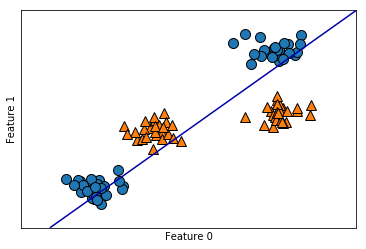

In [88]:
###A Linear model for classification will be able to separate using a LINE , Won't be able to do Good Job###
from sklearn.svm import LinearSVC
linear_svm=LinearSVC().fit(X,y)
#mglearn1.plots.plot_2d_separator(linear_svm,X)
#linear_svm.decision_function(np.array([[0.5,0.89],[.99,0.99],[-7.5,-5],[7.5,-15],[10,-15]]))
plot_2d_separator_nir(linear_svm,X)
mglearn1.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")



- ** Linear Model for classification can only separate points using Line and will not be able to do good Job **
- <span style="color:green"><strong>Let's expand the set of input faetures by adding third feature as feature1 ** 2 the square of 2nd feature. This can be represented into 3D scatter PLOT as below</strong></span>

In [89]:
X_new=np.hstack([X,X[:,1:]**2])

In [90]:
X_new.shape

(100, 3)

In [91]:
df=pd.DataFrame(X_new,columns=['X0','X1','X2'])
df['y']=y
df.head()

,X0,X1,X2,y
0,-1.721610,-1.480331,2.191381,1
1,-3.657338,-9.548238,91.168855,0
2,7.077816,0.995088,0.990200,1
3,-1.365799,-0.314862,0.099138,1
4,-2.665212,-3.125917,9.771354,1


In [92]:
from mpl_toolkits.mplot3d import Axes3D,axes3d

Text(0.5,0,'Feature 1**2')

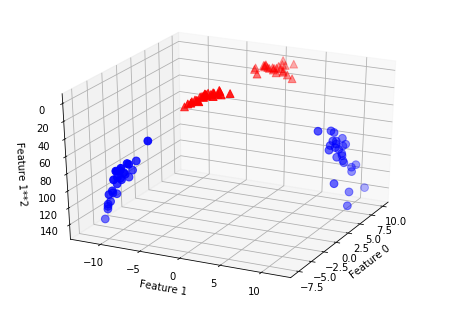

In [93]:
%matplotlib inline
figure = plt.figure()
ax=Axes3D(figure,elev=-152,azim=-26)
# plot first all points with y==0 then y==1
mask=y==0
ax.scatter(X_new[mask,0],X_new[mask,1],X_new[mask,2],c='b',cmap=cm2,s=60)
ax.scatter(X_new[~mask,0],X_new[~mask,1],X_new[~mask,2],c='r',marker='^',cmap=cm2,s=60)
ax.set_xlabel("Feature 0")
ax.set_ylabel("Feature 1")
ax.set_zlabel("Feature 1**2")

- ** ABOVE:<em>Easy to separate this 3 Dimension space using a PLANE </em>**
- ** Lets CONFIRM by fitting a LINEAR MODEL to this AUGMENTED data **


In [94]:
linear_svm_3d=LinearSVC().fit(X_new,y)

Text(0.5,0,'Feature 1 ** 2')

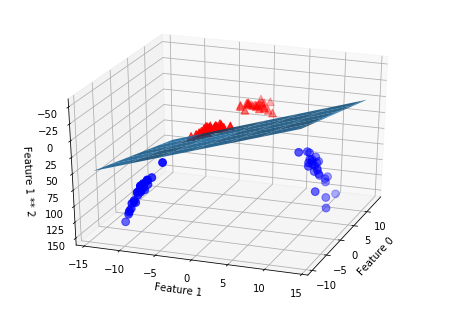

In [95]:
coef,intercept=linear_svm_3d.coef_.ravel(),linear_svm_3d.intercept_
# show linear decision boindary
figure = plt.figure()
ax=Axes3D(figure,elev=-152,azim=-20)

xx=np.linspace(X[:,0].min()-2,X[:,1].max()+2,50)
yy=np.linspace(X[:,1].min()-2,X[:,1].max()+2,50)
XX,YY=np.meshgrid(xx,yy)
ZZ= (coef[0] * XX + coef[1] * YY + intercept )/(-coef[2])
ax.plot_surface(XX,YY,ZZ,rstride=8,cstride=10,alpha=.9)

ax.scatter(X_new[mask,0],X_new[mask,1],X_new[mask,2],c='b',cmap=cm2,s=60)
ax.scatter(X_new[~mask,0],X_new[~mask,1],X_new[~mask,2],c='r',cmap=cm2,marker='^',s=60)

ax.set_xlabel("Feature 0")
ax.set_ylabel("Feature 1")
ax.set_zlabel("Feature 1 ** 2")

### As a function of original features, the linear SVM model is not actually linear anymore. Its not a line but more of ELLIPSE. Let's see the plot below

Text(0,0.5,'Feature 1')

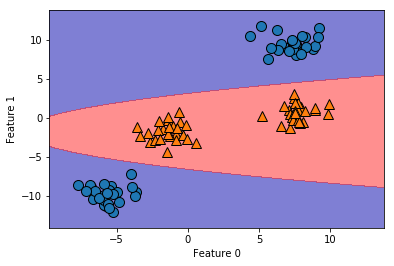

In [96]:
ZZ=YY**2
dec=linear_svm_3d.decision_function(np.c_[XX.ravel(),YY.ravel(),ZZ.ravel()])
plt.contourf(XX,YY,dec.reshape(XX.shape),levels=[dec.min(),0,dec.max()],cmap=cm2,alpha=0.5)
mglearn1.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

### 1. Very good explanation about SVM @ https://www.svm-tutorial.com/
### 2. Important Notes on SVM https://www.youtube.com/watch?v=9_DJ4KvyYoo&t=695s
### 3. From IIT Khg https://www.youtube.com/watch?v=SRVswRH5Q7E&t=258s
### 4. Analytics Vidya - https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/
- SVM algorithm craetes classfier which has maximum margin , but why ??
- Margin = Width of decision boundary that has no TRAINING SAMPLE
- Is LARGER MARGIN Better 
- Imagin to draw decision boundary INTUTIVELY -
- draw circle arund each training sample and continue increasing as log as NO DECISION BOUNDARY PASSES --
- If there is no region left , thats the decision bundary with maximum margin
- All the training data points that builds that DECISION Boundary are SUPPORT VECTOR
- Support Vectors = Sample that support or touches the DECISION BOUNDARY are SUPPORT VECOTR
- <b>If margin is large , future test sample is unlikely to cross over the DB</b>
- ** Foremally proved by 2 RUSSIAN Scientist **

$$R(\alpha) =R(\alpha)+\sqrt(f(h)/N)$$
- Goal is to keep the training error ==> 0 and / or h (VC dimension) minimum
- Consider Relative Margin = p/D

** If FEATURE dimension is not separable in the LOWER Dimension then we can't have SVM. We will have to CAST into higher dimensional space to run SVM **

### <span style=color:red>  Notes from Prof. B.K. Bishwas - IIT Kharagpur </span>
- Let's feature vector is X and classes are $c_1,c_2 $
- $ g(X) = W^tX+b$ OR $W^tX+W_0$ Where X = Feature Vector and W = Weight, $W_0,b$ = Bias
- W represents the orientation of HYPERPLANE
- If $g(X_1)>0, W^tX_1+b>0, then X_1==>Class C_1$ or $X_1==>C_2$
- While training the model , algorithm adjust W and b in such a way that sample data classifies to the right classification
- If distance from the boundary is large is the optimal classifier (SVM), tries to maximize the decision boundary from the feature vecrors
- ** While training the model **
- $y_i=\pm1, y_i$ is +ve if sample if in $c_1$ else -ve
- So $y_i*(W^tX+b)>0 $ for all i ==> This will help in designing the classifier
- p = unknown vector, apply this in W.p+b
- ** Distance of $X_i$ from hyerplane W.X+b=0 is $(W.X+b)/\bmod(W)$ **
- $(W.X+b)/\bmod(W)>=\gamma $, Or $(W.X+b)>=\gamma*\bmod(W)$ OR while applying scaling factor $(W.X+b)>=1$
- (W.X+b)>=+1 if X is in $c_1$ or (W.X+b)<=-1 if X is in $c_2$
- In other word, $y_i*(W*X+b)>=+1$ for all X, If X is support vector then only EQUALITY is true else it will be GREATER
- <span style = color:red><b>SUPPORT VECTOR</b></span>
- Feature vectors which influences the HYPERPLANE position are SUPPORT VECTORS, They are closest to the HYPERPLANE
- $y_i*(W.x_i+b)=1$ here $x_i$ is SUPPORT VECTOR 
- In order to maximize the margin , we either minimzes the w or maximizes b from the equation $(W.x_i+b)/\bmod(W)=\gamma$
- In order to minimize W or $\phi(W)=1/2.W^t.W=1/2.W.W$ for the given constraint as $y_i(Wx_i+b)=1$ <==CONSTRAINT
### <span style=color:green><b>LANGRAGIAN MULTIPLIER</b></span>: This is used bcuz we have to minimize W under the constraint given above
- $ L(W,b) = 1/2W.W - \sum(\alpha_i.y_i[(W.x_i+b)-1]$ Where $\alpha_i$ is LANGRAGIAN Multiplier
- After Partial derivative w.r.t W and b we obtain the following
- $\sum(\alpha_i.y_i)=0$ and $W=\sum(\alpha_i.y_i.x_i)$
- If $\alpha_i$ is larger then corresponding $x_i$ is Support Vector that influensces the Decision Boundary else $x_i$ doesn't contribute to decsion boundary
- If Feature vectors are not linearly SEPARABLE then we cast them to the higher dimension and make linearly separable before design SVM


### SVM : Non Linear separable samples - https://www.youtube.com/watch?v=ffF8UnbheLk&t=1278s


In [97]:
from IPython.display import Image

### <span style=color:red>  Some exercies:- </span>
- IRIS Dataset from Analytics Vidya
- Different parametrs and value (C, Gamma, kernel type)


In [98]:
from sklearn import svm, datasets
import numpy as np
import matplotlib.pyplot as plt

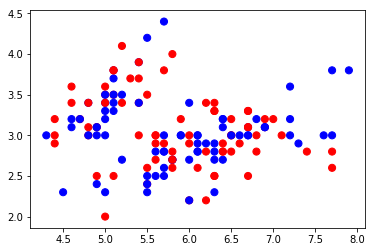

In [99]:
iris=datasets.load_iris()
X=iris.data[:,:2]
y=iris.target
df=pd.DataFrame(X,columns=['A','B'])
df['y']=y
plt.scatter(X[:,0],X[:,1],s=50,c=['r','b'])


In [100]:
# Create instance of SVM to fit iris data, don't scale since want to plot support vectors
# C is the regularization parameter
svc=svm.SVC(C=1.0,kernel='rbf').fit(X,y)

In [101]:
# Create meshgrid
x_min,x_max=X[:,0].min()-1,X[:,0].max()+1
y_min,y_max=X[:,1].min()-1,X[:,1].max()+1
h=(x_max/x_min)/100
xx,yy=np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
X_grid=np.c_[xx.ravel(),yy.ravel()]

In [102]:
Z=svc.predict(X_grid)
Z=Z.reshape(xx.shape)

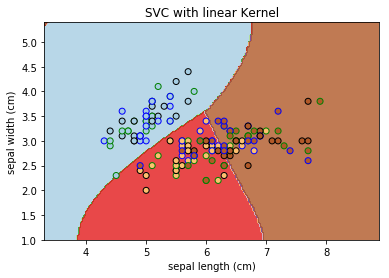

In [103]:
plt.subplot(1,1,1)
plt.contourf(xx,yy,Z,cmap=plt.cm.Paired,alpha=0.8)
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.Paired,edgecolors=['black','b','g'])
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('SVC with linear Kernel')
plt.show()

Text(0,0.5,'Feature 1')

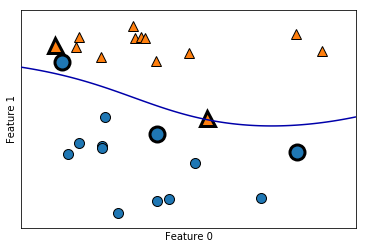

In [104]:
##Continue with Original Book
X,y= myFunc.make_handcrafted_dataset()
svc=svm.SVC(kernel='rbf',C=10,gamma=0.1).fit(X,y)
plot_2d_separator_nir(svc,X,eps=0.5)
myFunc.discrete_scatter(X[:,0],X[:,1],y)
sv=svc.support_vectors_
sv_labels=svc.dual_coef_.ravel()>0
myFunc.discrete_scatter(sv[:,0],sv[:,1],sv_labels,s=15,markeredgewidth=3)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

### Tuning up SVM Parameters (C = Regularization parameters , Varying importance of each point [dual_coef_],$\lambda$ = 1/2$\sigma^2$ (Width of gaussian curve)

In [105]:
A=np.array(range(1,10)).reshape(3,3)
for a,b in zip(A,[-1,0,2]):
    for x,y in zip(a,[10,11,12]):
        print(x,y,b)

1 10 -1
2 11 -1
3 12 -1
4 10 0
5 11 0
6 12 0
7 10 2
8 11 2
9 12 2


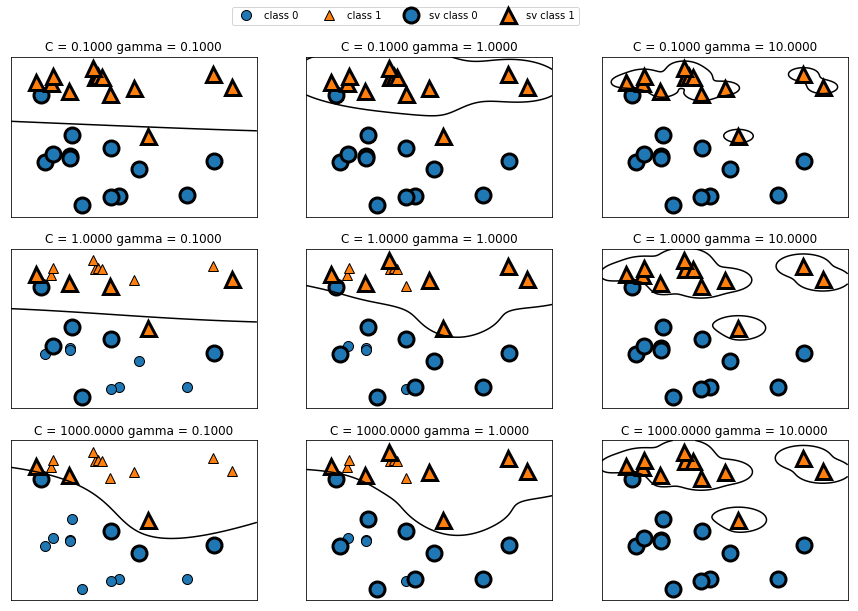

In [106]:
fig,axes=plt.subplots(3,3,figsize=(15,10))
for ax,C in zip(axes,[-1,0,3]):
    for a,gamma in zip(ax,range(-1,3)):
        mglearn1.plots.plot_svm(C,gamma,ax=a)
axes[0,0].legend(['class 0','class 1','sv class 0','sv class 1'],ncol=4,loc=(0.9,1.2))

In [107]:
## Apply breast cancer data set with dfeault value ==> C=1, gamma = 1/n_features
svc=svm.SVC()
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,random_state = 0)
svc.fit(X_train,y_train)
#X_train.shape,X_test.shape
print('Train accuracy :{:.2f}'.format(svc.score(X_train,y_train)))
print('Test  accuracy :{:.2f}'.format(svc.score(X_test,y_test)))

Train accuracy :1.00
Test  accuracy :0.63


#### Overfits quite substantially with perfect score of training set

Text(0,0.5,'Feature Magnitude')

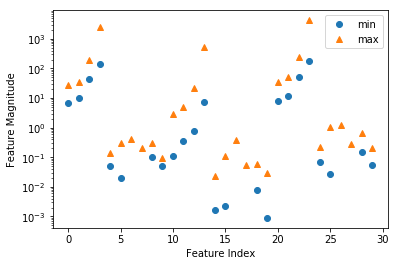

In [108]:
plt.plot(X_train.min(axis=0),'o',label='min')
plt.plot(X_train.max(axis=0),'^',label='max')
plt.yscale('log')
plt.legend(loc=1)
plt.xlabel('Feature Index')
plt.ylabel('Feature Magnitude')

In [109]:
## How to Normalize values of each predictor ==> Use MIN MAX SCALER 
## Lets do this manually now
min_on_training = X_train.min(axis=0)
train_range= X_train.max(axis=0) - min_on_training
X_train_scaled= (X_train - X_train.min(axis=0))/train_range
print('Scaled Min: {}'.format(X_train_scaled.min(axis=0)))
print('Scaled Max: {}'.format(X_train_scaled.max(axis=0)))

Scaled Min: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Scaled Max: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [110]:
# Same transformation in Test set
X_test_scaled = (X_test - min_on_training)/train_range

In [111]:
svc=svm.SVC()

In [112]:
svc.fit(X_train_scaled,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [113]:
print('Training set accuracy in scaled data set {:.3f}'.format(svc.score(X_train_scaled,y_train)))
print('Testing set accuracy in scaled data set {:.3f}'.format(svc.score(X_test_scaled,y_test)))

Training set accuracy in scaled data set 0.948
Testing set accuracy in scaled data set 0.951


In [114]:
# Now we can start increasing C or gamma to fit a more complex model
svc=svm.SVC(C=1000)

In [115]:
svc.fit(X_train_scaled,y_train)

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [116]:
print('Training set accuracy in scaled data set {:.3f}'.format(svc.score(X_train_scaled,y_train)))
print('Testing set accuracy in scaled data set {:.3f}'.format(svc.score(X_test_scaled,y_test)))

Training set accuracy in scaled data set 0.988
Testing set accuracy in scaled data set 0.972


## Strength , Weakness and parameters
- Kernelized SVM is powerful model - Performs well on variety of dataset
- SVM allow for complex decision boundary even if few features
- Works quite welll on low or high dimensional data (i.e. few or many features)
- 
<span style=color:red> 
Doesn't scale well with more data i.e. upto 10,000 DS is good but 100,000 or more is challenging w.r.t runtime and memory usage 
<br>Require careful data pre processing, That's why people prefer Tree based - random forest or gradient boosting </br>

- <span style=color:brown>
Parameters : C and kernel driven , gamma is inverse of gaussian width in RBF kernel